In [6]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
import os

#import coral
#ROOT_DIR = '/Users/ericyu3/Code/ArkinLab/'
ROOT_DIR = '.'
FILENAME = 'W3110.gb'

genome_path = os.path.join(ROOT_DIR, FILENAME)
if os.path.isfile(genome_path):
    template = coral.seqio.read_dna(genome_path)
else:
    template = coral.database.fetch_genome('AP009048.1') # Get W3110 genome
    coral.seqio.write_dna(template, genome_path)


In [7]:
with open(genome_path) as f:
    first_line = f.read().split()
    print first_line[0:100]

['LOCUS', 'AP009048', '4646332', 'bp', 'DNA', 'circular', 'BCT', '07-OCT-2016', 'DEFINITION', 'Escherichia', 'coli', 'str.', 'K-12', 'substr.', 'W3110', 'DNA,', 'complete', 'genome.', 'ACCESSION', 'AP009048', 'AB001340', 'D10483', 'D26562', 'D83536', 'D90699-D90711', 'D90713-D90754', 'D90756-D90878', 'D90880-D90897', 'VERSION', 'AP009048.1', 'DBLINK', 'BioProject:', 'PRJNA16351', 'BioSample:', 'SAMD00061081', 'KEYWORDS', '.', 'SOURCE', 'Escherichia', 'coli', 'str.', 'K-12', 'substr.', 'W3110', 'ORGANISM', 'Escherichia', 'coli', 'str.', 'K-12', 'substr.', 'W3110', 'Bacteria;', 'Proteobacteria;', 'Gammaproteobacteria;', 'Enterobacterales;', 'Enterobacteriaceae;', 'Escherichia.', 'REFERENCE', '1', 'AUTHORS', 'Musso,R.,', 'Di', 'Lauro,R.,', 'Rosenberg,M.', 'and', 'de', 'Crombrugghe,B.', 'TITLE', 'Nucleotide', 'sequence', 'of', 'the', 'operator-promoter', 'region', 'of', 'the', 'galactose', 'operon', 'of', 'Escherichia', 'coli', 'JOURNAL', 'Proc.', 'Natl.', 'Acad.', 'Sci.', 'U.S.A.', '74', 

In [8]:
tempBio = SeqIO.read(genome_path, 'genbank')

print tempBio

ID: AP009048.1
Name: AP009048
Description: Escherichia coli str. K-12 substr. W3110 DNA, complete genome
Database cross-references: BioProject:PRJNA16351, BioSample:SAMD00061081
Number of features: 8944
/comment=On or before Jan 23, 2006 this sequence version replaced
gi:21321891, gi:473770, gi:4902908, gi:1651234, gi:1651238,
gi:4062214, gi:1651250, gi:1651255, gi:1651263, gi:1651270,
gi:4062275, gi:1651283, gi:1651294, gi:1651305, gi:1651312,
gi:1651315, gi:1651326, gi:1651336, gi:4062329, gi:1651352,
gi:1651359, gi:1651362, gi:4062381, gi:1651374, gi:1651377,
gi:1651380, gi:1651384, gi:1651391, gi:1651399, gi:1651404,
gi:1651414, gi:1651424, gi:1651433, gi:1651442, gi:1651452,
gi:1651458, gi:1651461, gi:1651468, gi:4062539, gi:1651484,
gi:1651492, gi:1651500, gi:4062581, gi:1651508, gi:1651509,
gi:1651513, gi:1651520, gi:1651527, gi:1651533, gi:1651543,
gi:1651548, gi:1651553, gi:1651562, gi:1651569, gi:1651572,
gi:1651576, gi:1651585, gi:1651593, gi:1651596, gi:1663711,
gi:1651618,

In [9]:
def extractDelSeq(template,steps,verbose=False):
    delList = []
    for sNum, step in enumerate(steps):
        if verbose:
            print 'Step {}, {} deletion(s)'.format(sNum+1,len(step))
        stepDels = []
        for dNum, deletion in enumerate(step):
            start, stop = deletion[0],deletion[1]
            delSeq = str(template[start-1:stop])
            stepDels.append(delSeq)
            if verbose:
                print 'Deletion {}. Start: {}, stop: {}, length: {}'.format(dNum+1,start,stop,len(delSeq))
                print 'delSeq: {}...{}'.format(delSeq[:50],delSeq[-50:])
    #            print 'Length of deletions: {}'.format(len(stepDels))
        delList.append(stepDels)
    return delList

def create_genomes4(template,delList,names=[],withLambda=False,verbose=False):
    temp_genome = str(template)
    genomes = [temp_genome]
    for step, deletions in enumerate(delList):
        for delNum, deletion in enumerate(deletions):
            temp_genome = temp_genome.replace(deletion,'')
            if withLambda:
                temp_genome = insertLambda(temp_genome)
            if verbose:
                print 'Step {}, deletion {} (length {})'.format(step+1,delNum+1,len(temp_genome))
        genomes.append(temp_genome)
            
        if names != []:
            seq = SeqIO.SeqRecord(Seq(temp_genome,IUPAC.unambiguous_dna))
            seq.id = 'AC{}'.format(step+3)
            seq.description = names[step]
            SeqIO.write(seq,'./genomes/AC{}-{}.fasta'.format(step+3,names[step]),'fasta')
#            with open('./genomes/{}.genome'.format(names[step]),'w') as f:
#                f.write(temp_genome)
    return genomes

In [10]:
def insertLambda(genome):
    
    debug = 0
    
    lambdaStart = 'ATGAAATAGAAAAATGAATCCGTTGAAGCCTGC'
    lambdaEnd = 'ATATTACAACGCGGCAGCATTATGAGCTGGC'
    lambdaInsert = 'CTCGTTCGCTGCCACCTAAGAATACTCTACGGTCACATACTTTTGTTATCAATAAAAAAGGCCCCCCGTTAGGGAGGCCTTATTGTTCGTCTTAGAAAAACTCATCGAGCATCAAATGAAACTGCAATTTATTCATATCAGGATTATCAATACCATATTTTTGAAAAAGCCGTTTCTGTAATGAAGGAGAAAACTCACCGAGGCAGTTCCATAGGATGGCAAGATCCTGGTATCGGTCTGCGATTCCGACTCGTCCAACATCAATACAACCTATTAATTTCCCCTCGTCAAAAATAAGGTTATCAAGTGAGAAATCACCATGAGTGACGACTGAATCCGGTGAGAATGGCAAAAGCTTATGCATTTCTTTCCAGACTTGTTCAACAGGCCAGCCATTACGCTCGTCATCAAAATCACTCGCATCAACCAAACCGTTATTCATTCGTGATTGCGCCTGAGCGAGACGAAATACGCGATCGCTGTTAAAAGGACAATTACAAACAGGAATCGAATGCAACCGGCGCAGGAACACTGCCAGCGCATCAACAATATTTTCACCTGAATCAGGATATTCTTCTAATACCTGGAATGCTGTTTTCCCGGGGATCGCAGTGGTGAGTAACCATGCATCATCAGGAGTACGGATAAAATGCTTGATGGTCGGAAGAGGCATAAATTCCGTCAGCCAGTTTAGTCTGACCATCTCATCTGTAACATCATTGGCAACGCTACCTTTGCCATGTTTCAGAAACAACTCTGGCGCATCGGGCTTCCCATACAATCGATAGATTGTCGCACCTGATTGCCCGACATTATCGCGAGCCCATTTATACCCATATAAATCAGCATCCATGTTGGAATTTAATCGCGGCCTCGAGCAAGACGTTTCCCGTTGAATATGGCTaccagagctgccaccgctagagccTTTGTACAGTTCATCCATACCATGCGTGATGCCCGCTGCGGTTACGAACTCCAGCAGAACCATATGATCGCGTTTCTCGTTCGGATCTTTAGACAGAACGCTTTGCGTGCTCAGGTAATGATTGTCTGGCAGCAGAACAGGACCATCACCGATTGGAGTGTTTTGCTGGTAGTGATCAGCCAGCTGCACGCTGCCATCCTCCACGTTGTGGCGAATTTTAAAATTCGCTTTAATGCCATTTTTTTGTTTATCGGCGGTGATGTAAACATTGTGGCTGTTAAAATTGTATTCCAGCTTATGGCCCAGGATATTGCCGTCTTCTTTAAAGTCAATGCCTTTCAGCTCAATGCGGTTTACCAGGGTATCGCCTTCAAATTTCACTTCCGCACGCGTTTTGTACGTGCCGTCATCCTTAAAGGAAATCGTGCGTTCCTGCACATAGCCTTCCGGCATGGCGGACTTGAAGAAGTCATGCTGCTTCATATGGTCCGGATAACGAGCAAAGCACTGAACACCATAAGTCAGCGTCGTTACCAGAGTCGGCCAAGGTACCGGCAGTTTACCAGTAGTACAGATGAACTTCAGCGTCAGTTTACCATTAGTTGCGTCACCTTCACCCTCGCCACGCACGGAAAACTTATGACCGTTGACATCACCATCCAGTTCCACCAGAATAGGGACGACACCAGTGAACAGCTCTTCGCCTTTACGCATTTTTTACCTCCTTAAACTCCTTATTTTGCATCCCATTACTCGCATCCATTCTCAGGCTGTCTCGTCTCGTCTCATGAATCTATTATAGGTACAAAAAGATGCGAAGTCAATACTCTTTTTGCACTGAAGGTCCTCAATCGCACTGGAAACATCAAGGTCGtgagcttgtctttttaCTGACCTCCTGCCAGCAATAGTAAGACAACACGCAAAGTCTTGACATCAGGAAAATTTTTCTGTAGATTTAACGTATCCAGGATACATAGATTACCACAACTCCGAGCCCTTCCACCagctgtcaccggatgtgctttccggtctgatgagtccgtgaggacgaaacagcctctacaaattttgtttaaGCACTACAGCAACAACATAAGGGGGTATTCATGGCAAGTAGTGAAGACGTTATCAAAGAGTTCATGCGTTTCAAAGTTCGTATGGAAGGTTCCGTTAACGGTCACGAGTTCGAAATCGAAGGTGAAGGTGAAGGTCGTCCGTACGAAGGTACCCAGACCGCTAAACTGAAAGTTACCAAAGGTGGTCCGCTGCCGTTCGCTTGGGACATCCTGTCCCCGCAGTTCCAGTAcGGTTCCAAAGCTTACGTTAAACACCCGGCTGACATCCCGGACTACCTGAAACTGTCCTTCCCGGAAGGTTTCAAATGGGAACGTGTTATGAACTTCGAAGACGGTGGTGTTGTTACCGTTACCCAGGACTCCTCCCTGCAAGACGGTGAGTTCATCTACAAAGTTAAACTGCGTGGTACCAACTTCCCGTCCGACGGTCCGGTTATGCAGAAAAAAACCATGGGTTGGGAAGCTTCCACCGAACGTATGTACCCGGAAGACGGTGCTCTGAAAGGTGAAATCAAAATGCGTCTGAAACTGAAAGACGGTGGTCACTACGACGCTGAAGTTAAAACCACCTACATGGCTAAAAAACCGGTTCAGCTGCCGGGTGCTTACAAAACCGACATCAAACTGGACATCACCTCCCACAACGAAGACTACACCATCGTTGAACAGTACGAACGTGCTGAAGGTCGTCACTCCACCGGTGCTTAATAACTCGGTACCAAATTCCAGAAAAGAGGCCTCCCGAAAGGGGGGCCTTTTTTCGTTTTGGTCCaCCTCGTCTCAACCAAAGCAATCAACCCATCAACCACCTGGCTCGTTCTTAACTCAACAGAAGATGCTTTGTGCATACAGCCCCTCGTTTATTATTTATCTCCTCAGCCAGCCGCTGTGCTTTCAGTGGATTTCGGATAACAGAAAGGCCGGGAAATACCCAGCCTCGCTTTGTAACGGAGTAGACGAAAGTGATTGCGCCTACCCgaattattttttcgcgggtgaaacgactcctggtttgtacaaagccagcagttcgtccacctttttacgtgtgccgccgttgctgcttatactgcgtcgaactttgacgacatgcaattttgcgcgctgataccactcacgcgttaacatcgtatcgtgattggagatcagcactggaatatggcgctcaaccagaccttcggcgatctccgccagatgcgcttgttgttcaagcgtaaaactgtttgtgtgatacgccgtaaagttggcggtcgcagacagcggtgcataaggcggatcgcaatagacgacggatgcatcatctgcgcgcgccatgctatcggcgtaagactcacaatagaaaaaggcattctgcgctttttcagcgaagtgatacaactctgcttccgggaaatagggttttttgtagcggccgaacggcacgttaaactcaccgcgcagattgtaacgacacaggccgttgtaaccgtagcggttcaaatataaaaacagtaccgcccgacggaacggatcctggcttttgttgaactcttcgcggaactgatagtaaacctcggcgcaatttgtttcgggaacaaacagctcgcgtgcggcctgtacgtactcatcagtacgcatcttcacaatgttatagagactgatcaggtcgctattgatatcggcaaggatataacgagaaaagtcggtgttgagaaacaccgacccggcacctacaaaaggctcaaccagacattcgcccttgggcaaatgccgtttaatatcatcaagcaggggatacttgccccctgcccacttcaaaaaagcgcgatttttcttcatgctgactaactaattacaccttctccGGATATTATCGTGAGGATGCGTCATCGCCATTGCTCCCCAAATACAAAACCAATTTCAGCCAGTGCCTCGTCCATTTTTTCGATGAACTCCGGCACGATCTCGTCAAAACTCGCCATGTACTTTTCATCCCGCTCAATCACGACATAATGCAGGCCTTCACGCTTCATACGCGGGTCATAGTTGGCAAAGTACCAGGCATTTTTTCGCGTCACCCACATGCTGTACTGCACCTGGGCCATGTAAGCTGACTTTATGGCCTCGAAACCACCGAGCCGGAACTTCATGAAATCCCGGGAGGTAAACGGGCATTTCAGTTCAAGGCCGTTGCCGTCACTGCATAAACCATCGGGAGAGCAGGCGGTACGCATACTTTCGTCGCGATAGATGATCGGGGATTCAGTAACATTCACGCCGGAAGTGAATTCAAACAGGGTTCTGGCGTCGTTCTCGTACTGTTTTCCCCAGGCCAGTGCTTTAGCGTTAACTTCCGGAGCCACACCGGTGCAAACCTCAGCAAGCAGGGTGTGGAAGTAGGACATTTTCATGTCAGGCCACTTCTTTCCGGAGCGGGGTTTTGCTATCACGTTGTGAACTTCTGAAGCGGTGATGACGCCGAGCCGTAATTTGTGCCACGCATCATCCCCCTGTTCGACAGCTCTCACATCGATCCCGGTACGCTGCAGGATAATGTCCGGTGTCATGCTGCCACCTTCTGCTCTGCGGCTTTCTGTTTCAGGAATCCAAGAGCTTTTACTGCTTCGGCCTGTGTCAGTTCTGACGATGCACGAATGTCGCGGCGAAATATCTGGGAACAGAGCGGCAATAAGTCGTCATCCCATGTTTTATCCAGGGCGATCAGCAGAGTGTTAATCTCCTGCATGGTTTCATCGTTAACCGGAGTGATGTCGCGTTCCGGCTGACGTTCTGCAGTGTATGCAGTATTTTCGACAATGCGCTCGGCTTCATCCTTGTCATAGATACCAGCAAATCCGAAGGCCAGACGGGCACACTGAATCATGGCTTTATGACGTAACATCCGTTTGGGATGCGACTGCCACGGCCCCGTGATTTCTCTGCCTTCGCGAGTTTTGAATGGTTCGCGGCGGCATTCATCCATCCATTCGGTAACGCAGATCGGATGATTACGGTCCTTGCGGTAAATCCGGCATGTACAGGATTCATTGTCCTGCTCAAAGTCCATGCCATCAAACTGCTGGTTTTCATTGATGATGCGGGACCAGCCATCAACGCCCACCACCGGAACGATGCCATTCTGCTTATCAGGAAAGGCGTAAATTTCTTTCGTCCACGGATTAAGGCCGTACTGGTTGGCAACGATCAGTAATGCGATGAACTGCGCATCGCTGGCATCACCTTTAAATGCCGTCTGGCGAAGAGTGGTGATCAGTTCCTGTGGGTCGACAGAATCCATGCCGACACGTTCAGCCAGCTTCCCAGCCAGCGTTGCGAGTGCAGTACTCATTCGTTTTATACCTCTGAATCAATATCAACCTGGTGGTGAGCAATGGTTTCAACCATGTACCGGATGTGTTCTGCCATGCGCTCCTGAAACTCAACATCGTCATCAAACGCACGGGTAATGGATTTTTTGCTGGCCCCGTGGCGTTGCAAATGATCGATGCATAGCGATTCAAACAGGTGCTGGGGCAGGCCTTTTTCCATGTCGTCTGCCAGTTCTGCCTCTTTCTCTTCACGGGCGAGCTGCTGGTAGTGACGCGCCCAGCTCTGAGCCTCAAGACGATCCTGAATGTAATAAGCGTTCATGGCTGAACTCCTGAAATAGCTGTGAAAATATCGCCCGCGAAATTCTATCACTGATAGGGATGAATCTATTATAGGCTATCAATGATAGGAAGTCAATACTCTATCGGTTGTATGGATCCAGACGCGCGAATTGTCGAGGGAAATCATAAAAAATTTATTTGCTTTCAGGAAAATTTTTCTGTATAATAGATTCATAAATTTGAGAGAAGAGTTTAAATATGGCTGGTTCTCGCAGAAAGAAACATATCCATGAAATCCCGCCCCGAATTCATATGTCTAGATTAGATAAAAGTAAAGTGATTAACAGCGCATTAGAGCTGCTTAATGAGGTCGGAATCGAAGGTTTAACAACCCGTAAACTCGCCCAGAAGCTAGGTGTAGAGCAGCCTACATTGTATTGGCATGTAAAAAATAAGCGGGCTTTGCTCGACGCCTTAGCCATTGAGATGTTAGATAGGCACCATACTCACTTTTGCCCTTTAGAAGGGGAAAGCTGGCAAGATTTTTTACGTAATAACGCTAAAAGTTTTAGATGTGCTTTACTAAGTCATCGCGATGGAGCAAAAGTACATTTAGGTACACGGCCTACAGAAAAACAGTATGAAACTCTCGAAAATCAATTAGCCTTTTTATGCCAACAAGGTTTTTCACTAGAGAATGCATTATATGCACTCAGCGCTGTGGGGCATTTTACTTTAGGTTGCGTATTGGAAGATCAAGAGCATCAAGTCGCTAAAGAAGAAAGGGAAACACCTACTACTGATAGTATGCCGCCATTATTACGACAAGCTATCGAATTATTTGATCACCAAGGTGCAGAGCCAGCCTTCTTATTCGGCCTTGAATTGATCATATGCGGATTAGAAAAACAACTTAAATGTGAAAGTGGGTCTTAACAGTTCCTGGATATCCGGATGAAGGCACGAACCCAGTGGACATAACCCTGATAAATGCTTCAATAATATTGAAAAAGGAAGAGTATGAGTATTCAACATTTCCGTGTCGCCCTTATTCCCTTTTTTGCGGCATTTTGCCTTCCTGTTTTTGCTCACCCAGAAACGCTGGTGAAAGTAAAAGATGCTGAAGATCAGTTGGGTGCACGAGTGGGTTACATCGAACTGGATCTCAACAGCGGTAAGATCCTTGAGAGTTTTCGCCCCGAAGAACGTTTTCCAATGATGAGCACTTTTAAAGTTCTGCTATGTGGCGCGGTATTATCCCGTATTGACGCCGGGCAAGAGCAACTCGGTCGCCGCATACACTATTCTCAGAATGACTTGGTTGAGTACTCACCAGTCACAGAAAAGCATCTTACGGATGGCATGACAGTAAGAGAATTATGCAGTGCTGCCATAACCATGAGTGATAACACTGCGGCCAACTTACTTCTGACAACGATCGGAGGACCGAAGGAGCTAACCGCTTTTTTGCACAACATGGGGGATCATGTAACTCGCCTTGATCGTTGGGAACCGGAGCTGAATGAAGCCATACCAAACGACGAGCGTGACACCACGATGCCTGTAGCAATGGCAACAACGTTGCGCAAACTATTAACTGGCGAACTACTTACTCTAGCTTCCCGGCAACAATTAATAGACTGGATGGAGGCGGATAAAGTTGCAGGACCACTTCTGCGCTCGGCCCTTCCGGCTGGCTGGTTTATTGCTGATAAATCTGGAGCCGGTGAGCGTGGGTCTCGCGGTATCATTGCAGCACTGGGGCCAGATGGTAAGCCCTCCCGTATCGTAGTTATCTACACGACGGGGAGTCAGGCAACTATGGATGAACGAAATAGACAGATCGCTGAGATAGGTGCCTCACTGATTAAGCATTGGTAATTTGTCCACTACGTGAAAGGCGAGATCACCAAGGTAGTCGGCAAATAATGTCTAACAATTCGTTCAAGCCGACGGATATCGAGCTCGCTTGGACTCCTGTTGATAGATCCAGTAATGACCTCAGAACTCCATCTGGATTTGTTCAGAACGCTCGGTTGCCGCCGGGCGTTTTTTATTGGTGAGAATCCAAGC'.upper()
    genome = str(genome)
    insStart = genome.find(lambdaStart)
    insEnd = genome.find(lambdaEnd)
    newGenome = genome[:insStart] + lambdaStart + lambdaInsert + genome[insEnd:]
    if debug:
        print genome[insStart-10:insStart+50]
        print newGenome[insStart-10:insStart+50]
        print genome[insEnd-10:insEnd+10]
        newInsEnd = newGenome.find(lambdaEnd)
        print newGenome[newInsEnd-10:newInsEnd+10]
        print '{} lambda length'.format(len(lambdaInsert))
        print '{} bases inserted.'.format(len(newGenome) - len(genome))
    return newGenome

## Deletion loci & run strain generator code

In [11]:
#list of beginning and end points of to-be-deleted sequences
step1 = [(1049227,1097311)]
step2 = [(3109247,3133480)]
step3 = [(4239495,4255870)]
step4 = [(1198444,1225484)]
step5 = [(1630054,1640180),(1641770,1649361)]
step6 = [(518367,533048),(535841,550551),(564277,608454)]
step7 = [(3486428,3496908),(3536156,3549686),(3556478,3576238)]
step8 = [(2984498,3032266)]
step9 = [(244301,253746),(262300,387867),(389475,404039)]
step10 = [(3697305,3709526),(3762909,3772816),(3774088,3785257)]
step11 = [(1963664,1992215),(1995801,2027348),(2032588,2043515),(2068289,2081066),(2103532,2115203)]
step12 = [(2754815,2788618),(2794312,2800028),(2824452,2829398)]
step13 = [(3361081,3370891)]
step14 = [(2145403,2186994),(2199808,2228989),(2255035,2262631)]
step15 = [(3076224,3078055)]
step16 = [(4501438,4514770),(4523114,4604874)]
step17 = [(729157,739929)]
step18 = [(4414768,4428387)]
step19 = [(4003005,4021346)]
step20 = [(832889,848426),(867975,883810),(891335,909716)]
step21 = [(3164770,3172081)]
step22 = [(675440,689710)]
step23 = [(2422504,2433237),(2471991,2481621)]
step24 = [(4170563,4186908)]
step25 = [(2385401,2394610)]
step26 = [(3411500,3421220)]
step27 = [(2909410,2909709)]
MGF01 = [(167401,173315)]
MGF02 = [(640669,659192),(2921194,2943638),(65857,78797),(4128291,4141015),
         (1853580,1864142),(3794688,3803458),(3224890,3240400),(4055372,4061465),
         (1875288,1888499),(2876630,2876783),(2599858,2613439)]
DGF298 = [(15445,16903),(19646,20508),(1098128,1117068),(1296003,1308864),(1359517,1368530),(1522387,1543782),
          (1592568,1599800),(1651508,1657863),(2091353,2091607),(2289724,2293603),(2411459,2412234),(2494688,2513688),
          (2519718,2523278),(2909410,2909709),(3183787,3188521),(3746428,3751980),(3871777,3914528),(3987068,3989225),
          (4447062,4453719),(1130992,1142564),(1396605,1520045),(1582557,1592251),(1607823,1624231),(2361574,2382929),
          (2836910,2855462),(3058023,3068464),(3258359,3269672),(3730114,3742029),(4281498,4291254),(4298072,4366613),
          (747145,753217),(3918091,3969123)]

steps = [step1,step2,step3,step4,step5,step6,step7,step8,step9,step10,step11,step12,step13,
         step14,step15,step16,step17,step18,step19,step20,step21,step22,step23,step24,step25,
         step26,step27,MGF01,MGF02,DGF298]

growsteps = []

modified_genome = template.copy()

#list to which modified genomes are added
strains = []

### Generate deletion strings from template genome

In [12]:
delList = extractDelSeq(modified_genome,steps,verbose = False)

Make names for each genome

In [13]:
names = ['Step_{:02d}'.format(i) for i in range(1,28)]
names.append('MGF-01')
names.append('MGF-02')
names.append('DGF-298')

Create genome sequences for each deletion set, write to './genomes' directory

In [14]:
test = create_genomes4(modified_genome,delList)

In [15]:
allGenomes = create_genomes4(modified_genome,delList,names,withLambda=True,verbose = True)

Step 1, deletion 1 (length 4602887)
Step 2, deletion 1 (length 4578653)
Step 3, deletion 1 (length 4562277)
Step 4, deletion 1 (length 4535236)
Step 5, deletion 1 (length 4525109)
Step 5, deletion 2 (length 4517517)
Step 6, deletion 1 (length 4502835)
Step 6, deletion 2 (length 4488124)
Step 6, deletion 3 (length 4443946)
Step 7, deletion 1 (length 4433465)
Step 7, deletion 2 (length 4419934)
Step 7, deletion 3 (length 4400173)
Step 8, deletion 1 (length 4352404)
Step 9, deletion 1 (length 4342958)
Step 9, deletion 2 (length 4217390)
Step 9, deletion 3 (length 4202825)
Step 10, deletion 1 (length 4190603)
Step 10, deletion 2 (length 4180695)
Step 10, deletion 3 (length 4169525)
Step 11, deletion 1 (length 4140973)
Step 11, deletion 2 (length 4109425)
Step 11, deletion 3 (length 4098497)
Step 11, deletion 4 (length 4085719)
Step 11, deletion 5 (length 4074047)
Step 12, deletion 1 (length 4040243)
Step 12, deletion 2 (length 4034526)
Step 12, deletion 3 (length 4029579)
Step 13, deletion

### Plot genome sizes as function of deletion step

In [16]:
genLen = [len(gen) for gen in allGenomes]
print genLen

[4646332, 4602887, 4578653, 4562277, 4535236, 4517517, 4443946, 4400173, 4352404, 4202825, 4169525, 4074047, 4029579, 4019768, 3941397, 3939565, 3844471, 3833698, 3820078, 3801736, 3751980, 3744668, 3730397, 3710032, 3693686, 3684476, 3674755, 3674455, 3668540, 3534018, 2996461]


In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

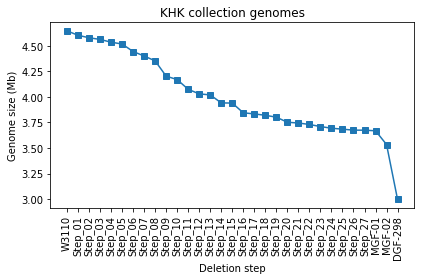

In [23]:
stepNum = range(len(genLen))
pltNames = names[:]
pltNames[:0] = ['W3110']
plt.plot(stepNum,[g/1.0e6 for g in genLen],'s-')
plt.title('KHK collection genomes')
plt.xlabel('Deletion step')
plt.ylabel('Genome size (Mb)');
plt.xticks(stepNum,pltNames,rotation='vertical');
plt.tight_layout()
plt.savefig('figs/genomeReduction.pdf')

In [54]:
stepNum = range(1,11)
pltNames = ['W3110','Step 6','Step 7','Step 11','Step 12','Step 15','Step 16','MGF-01','MGF-02','DGF-298']
KHK10 = [genLen[i] for i in [0,6,7,11,12,15,16,28,29,30]]

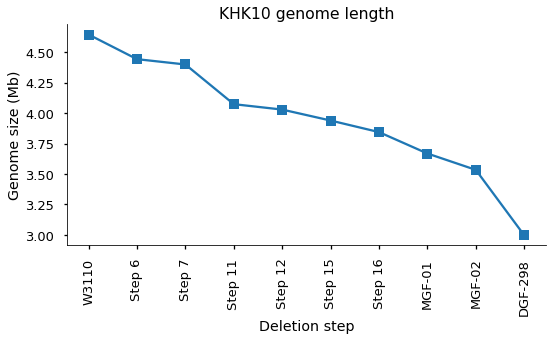

In [58]:
sns.set_context('talk')
fig = plt.figure(figsize=(8,5))
plt.plot(stepNum,[g/1.0e6 for g in KHK10],'s-')
plt.title('KHK10 genome length')
plt.xlabel('Deletion step')
plt.ylabel('Genome size (Mb)');
plt.xticks(stepNum,pltNames,rotation='vertical');
plt.tight_layout()
plt.savefig('figs/KHK10.pdf')
sns.despine()

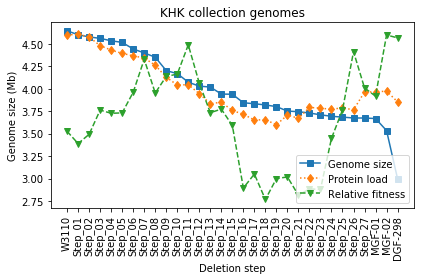

In [49]:
stepNum = range(len(genLen))
plt.plot(stepNum,[g/1.0e6 for g in genLen],'s-')
plt.plot(stepNum,protStep,'d:')
plt.plot(stepNum,cf,'v--')
plt.title('KHK collection genomes')
plt.xlabel('Deletion step')
plt.ylabel('Genome size (Mb)');
plt.xticks(stepNum,pltNames,rotation='vertical');
plt.legend(['Genome size','Protein load','Relative fitness'],loc='lower right')
plt.tight_layout()
plt.savefig('figs/projected_genomeReduction_scores.pdf')


In [25]:
import numpy as np

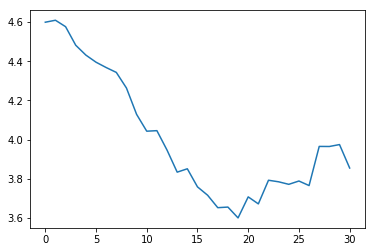

In [48]:
protAbund = np.random.normal(-0.2,0.4,size=len(genLen))
protStep = [np.sum(protAbund[:i]) for i in range(1,32)]
protStep = [4.6 + p/np.abs(np.min(protStep)) for p in protStep]
plt.plot(protStep)

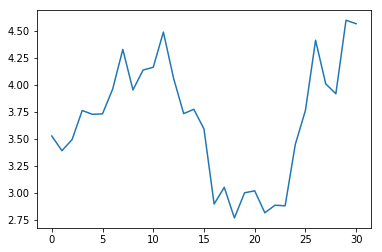

In [45]:
fitStep = np.random.normal(0.0,0.2,size=len(genLen))
cf = [np.sum(fitStep[:i]) for i in range(1,32)]
cf = [3.6 + f/(np.max(cf)) for f in cf]
plt.plot(cf)